## In this part, a second modeling using SMOTE oversampling is performed to see if by balancing the training data, we can get better metrics!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import confusion_matrix,recall_score,precision_recall_curve,auc,roc_curve,roc_auc_score,classification_report

In [2]:
df=  pd.read_csv('Voices_Cleaned.csv', index_col=0)

In [3]:
df= df.drop(columns=['date','age','user','pronounce'])

In [36]:
model_features = ['mean','std','median','first_q', 'third_q', 'inter_q', 'skewness', 'kurtosis','mode','peak']

In [4]:
df.sex = df.sex.astype(int)

In [5]:
oversample = SMOTE(random_state=23)

In [6]:
def data_prepration(x): 
    x_features= x.loc[:,x.columns != "sex"]
    x_labels=x.loc[:,x.columns=="sex"]
    x_features_train,x_features_test,x_labels_train,x_labels_test = train_test_split(x_features,x_labels,test_size=0.2)
    print("length of training data")
    print(len(x_features_train))
    print("length of testing data")
    print(len(x_features_test))
    return(x_features_train,x_features_test,x_labels_train,x_labels_test)

In [8]:
data_train_X,data_test_X,data_train_y,data_test_y=data_prepration(df)

length of training data
4377
length of testing data
1095


In [10]:
columns = data_train_X.columns

In [14]:
os_data_X,os_data_y=oversample.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["sex"])

print("length of oversampled data is ",len(os_data_X))
print("Number of males in oversampled data",len(os_data_y[os_data_y["sex"]==0]))
print("No.of females in oversampled data",len(os_data_y[os_data_y["sex"]==1]))

length of oversampled data is  8142
Number of males in oversampled data 4071
No.of females in oversampled data 4071


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
scaler = StandardScaler()
scaler.fit(df.loc[:,model_features]) 
X_train = scaler.transform(os_data_X.loc[:,model_features])
X_test = scaler.transform(data_test_X.loc[:,model_features])
y_train = list(os_data_y['sex'].values)
y_test = list(data_test_y['sex'].values)

In [22]:
#Train decision tree model
tree = DecisionTreeClassifier(random_state=23).fit(X_train, y_train)
print('Decision Tree Report')
print('train score is %s' %tree.score(X_train, y_train))
print('test score is %s' %tree.score(X_test, y_test))



#Train random forest model
forest = RandomForestClassifier(n_estimators=100, random_state=23).fit(X_train, y_train)
print('Random Forests Report')
print('train score is %s' %forest.score(X_train, y_train))
print('test score is %s' %forest.score(X_test, y_test))


#Train gradient boosting model
gb = GradientBoostingClassifier(random_state=23).fit(X_train, y_train)
print('Gradient Boosting Report')
print('train score is %s' %gb.score(X_train, y_train))
print('test score is %s' %gb.score(X_test, y_test))


Decision Tree Report
train score is 1.0
test score is 0.8858447488584474
Random Forests Report
train score is 1.0
test score is 0.9187214611872146
Gradient Boosting Report
train score is 0.9032178825841317
test score is 0.8365296803652968


In [41]:
def create_report(model,X_train,X_test,y_train,y_test):
    clf= model
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    metrics_matrix=confusion_matrix(y_test,pred)
    print("the accuracy for this model is :",(metrics_matrix[0,0]+metrics_matrix[1,1])/(metrics_matrix[0,0]+metrics_matrix[0,1]+metrics_matrix[1,0]+metrics_matrix[1,1]))
    print("the recall for this model is :",metrics_matrix[1,1]/(metrics_matrix[1,1]+metrics_matrix[1,0]))

    fig= plt.figure(figsize=(6,3))
    print("TP",metrics_matrix[1,1]) 
    print("TN",metrics_matrix[0,0]) 
    print("FP",metrics_matrix[0,1]) 
    print("FN",metrics_matrix[1,0])
    sns.heatmap(metrics_matrix,cmap="coolwarm",annot=True,linewidths=0.5)
    plt.title("Confusion_matrix")
    plt.xlabel("Predicted_Sex")
    plt.ylabel("Real_Sex")
    plt.show()
    print("\n----------Classification Report----------")
    print(classification_report(y_test,pred))


the accuracy for this model is : 0.8858447488584474
the recall for this model is : 0.4470588235294118
TP 38
TN 932
FP 78
FN 47


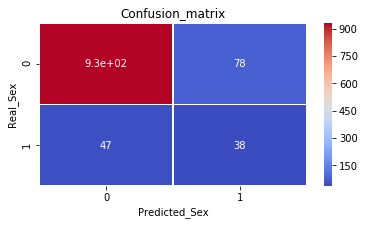


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.95      0.92      0.94      1010
           1       0.33      0.45      0.38        85

   micro avg       0.89      0.89      0.89      1095
   macro avg       0.64      0.68      0.66      1095
weighted avg       0.90      0.89      0.89      1095



In [42]:
create_report(DecisionTreeClassifier(random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.9187214611872146
the recall for this model is : 0.4235294117647059
TP 36
TN 970
FP 40
FN 49


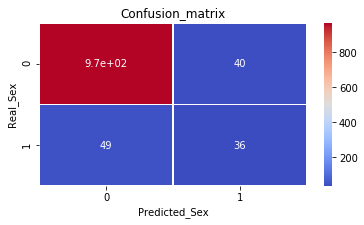


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1010
           1       0.47      0.42      0.45        85

   micro avg       0.92      0.92      0.92      1095
   macro avg       0.71      0.69      0.70      1095
weighted avg       0.91      0.92      0.92      1095



In [43]:
create_report(RandomForestClassifier(n_estimators=100,random_state=23),X_train,X_test,y_train,y_test)

the accuracy for this model is : 0.8365296803652968
the recall for this model is : 0.5882352941176471
TP 50
TN 866
FP 144
FN 35


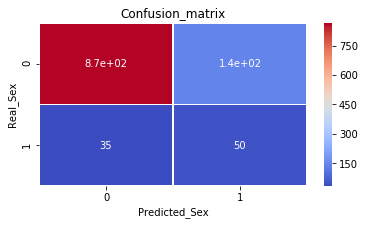


----------Classification Report----------
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1010
           1       0.26      0.59      0.36        85

   micro avg       0.84      0.84      0.84      1095
   macro avg       0.61      0.72      0.63      1095
weighted avg       0.91      0.84      0.86      1095



In [44]:
create_report(GradientBoostingClassifier(random_state=23),X_train,X_test,y_train,y_test)

## The recall score for DecisionTree is increased from 0.33 to 0.44 and f1-score increased from 0.3 to 0.38 !



## The recall score for RandomForest is increased from 0.31 to 0.42 and f1-score increased from 0.41 to 0.45 !




## The recall score for GradiantBoosting is increased from 0.13 to 0.58 and f1-score increased from 0.23 to 0.36 !



In [35]:
def importances_graphs(model):
    number_features = len(model_features)
    plt.figure(1,figsize=(16,8))
    plt.bar(range(number_features), model.feature_importances_, align='center')
    plt.xticks(np.arange(number_features), model_features)
    plt.ylabel("Importance")
    plt.xlabel("Feature ")
    plt.title(model.__class__.__name__)
    plt.show()

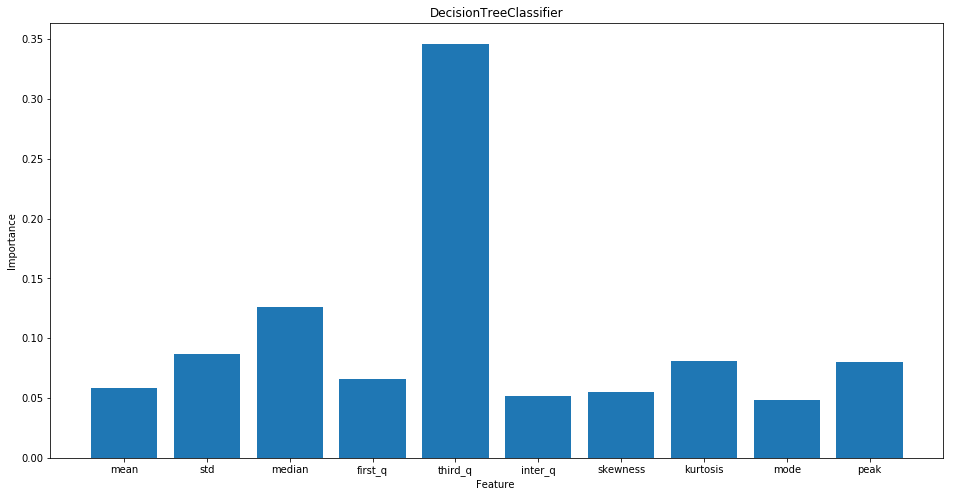

In [37]:
importances_graphs(tree)

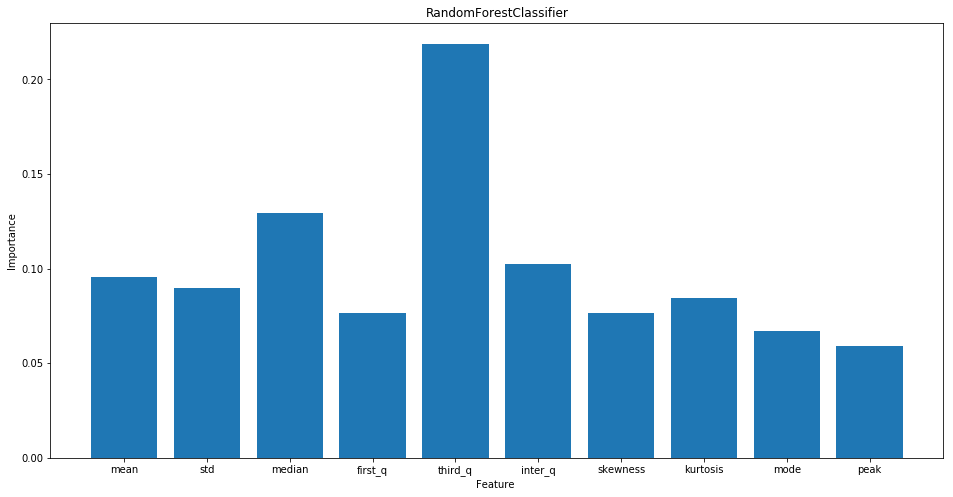

In [38]:
importances_graphs(forest)

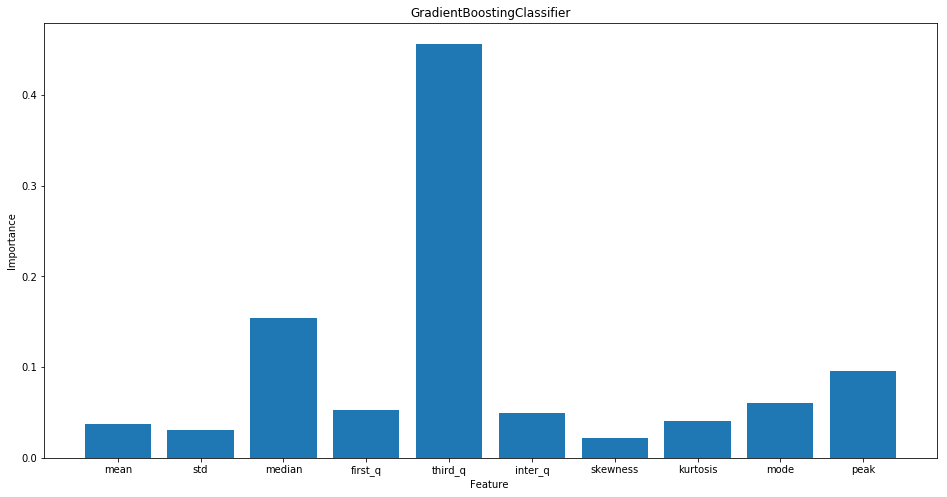

In [39]:
importances_graphs(gb)

## In next step I will reduce the number of features, to see if it can improve the predition power! Please go to notebook 06_ml_third_SMOTE_features_reduced